In [1]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(tidymodels)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yards

In [2]:
players <- read_csv('players.csv')
sessions <- read_csv('sessions.csv')
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.72e+12,1.72e+12


In [3]:
players_use <- players |>
    select(experience, subscribe, played_hours, gender, Age) 

head(players_use)

players_numeric <- players_use |>
    mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5),
    subscribe = as.numeric(subscribe),  # 1 = TRUE, 0 = FALSE
    gender = case_when(
      gender == "Male" ~ 1,
      gender == "Female" ~ 2,
      gender == "Non-binary" ~ 3,
      gender == "Transgender" ~ 4,
      gender == "Agender" ~ 5,
      gender == "Two-Spirited" ~ 6,
      gender == "Prefer not to say" ~ 7,
      gender == "Other" ~ 8),
    played_hours = as.numeric(played_hours),  
    Age = as.numeric(Age))

head(players_numeric)



experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17


experience,subscribe,played_hours,gender,Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,30.3,1,9
4,1,3.8,1,17
4,0,0.0,1,17
2,1,0.7,2,21
3,1,0.1,1,21
2,1,0.0,2,17


In [4]:
str(players_numeric)

tibble [196 × 5] (S3: tbl_df/tbl/data.frame)
 $ experience  : num [1:196] 5 4 4 2 3 2 3 2 2 4 ...
 $ subscribe   : num [1:196] 1 1 0 1 1 1 1 0 1 1 ...
 $ played_hours: num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ gender      : num [1:196] 1 1 1 2 1 2 2 1 1 2 ...
 $ Age         : num [1:196] 9 17 17 21 21 17 19 21 17 22 ...


In [5]:
write.csv(players_numeric, "players_numeric_cleaned.csv", row.names = FALSE)

Coding for classification model will be below

Rows: 196 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): experience, subscribe, played_hours, gender, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 30 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 30.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rh

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,18.80356,3,7.306771,Preprocessor1_Model02


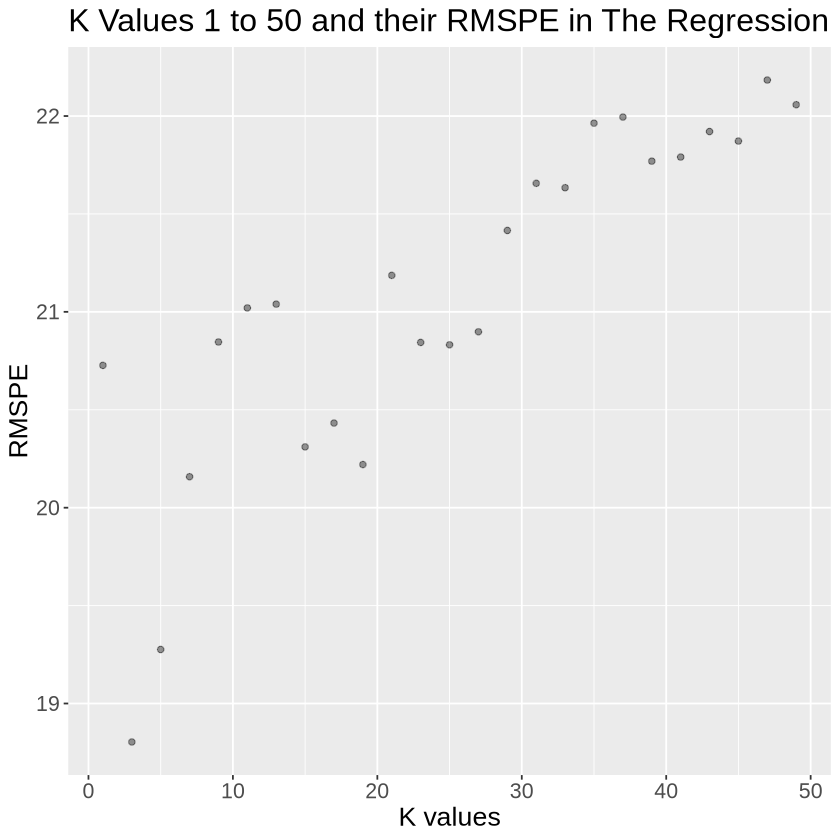

In [6]:
set.seed(2025)

numeric_cleaned_players<- read_csv("players_numeric_cleaned.csv")
# head(numeric_cleaned_players)

#split of data set for testing and training
players_split <- initial_split(numeric_cleaned_players, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)


#model spec
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

#model recipe
players_recipe <- recipe(played_hours ~ ., data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

#preping for cross-validation
players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

#model workflow
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)


#creating K values for tune testing in our workflow
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

player_tuning_results <- players_fit |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
# player_tuning_results

#add options graph size editor here
rmse_best_k_plot <- player_tuning_results |> 
    ggplot(aes(x= neighbors, y=mean)) +
    geom_point(alpha = 0.4) +
    # geom_line() +
    labs(x='K values', y='RMSPE', title='K Values 1 to 50 and their RMSPE in The Regression Model') +
    theme(text = element_text(size = 16))
rmse_best_k_plot

#finding the best k value which ends up being k = 3
players_best_k <- player_tuning_results |>
    filter(mean == min(mean))
players_best_k

In [33]:
#building of proper model with k = 3. This was determined above through cross-validation.
set.seed(2024)

mim_k <- players_best_k |> pull(neighbors)

#model spec
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = mim_k) |>
    set_engine("kknn") |>
    set_mode("regression")

#No need for a new recipe old one will work fine for the final regression model

#model workflow
players_best_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_best_spec) |>
    fit(data = players_train)

players_summary <- players_best_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,31.40456
